# Bias Replication Study
## Abstract
This data frame represents disparities in medical data, including medical cost, risk score, and number of chronic illnesses, between Black and white patients. The plots shown are visual representations of such disparities, replicating studies by Obermeyer et al. in 2019 article "Dissecting Racial Bias in an Algorithm Used to Manage the Health of Populations." These plots show clear distinctions between the costs incurred by Black and white patients and the likelihood of being referred to a high-risk medical program for a given number of illnesses. The linear regression I performed displays logarithmic coefficient w_b, which, when presented as $e^(w_b)$, represents the percentage of a white patient's cost that a Black patient must pay. My calculation revealed that a Black patient pays over 100% of what a white patient pays for the same illness(es), supporting the idea that racial disparities are prevalent in healthcare. 

In [2]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)
df

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,0,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,1,0,0,1,0,0,1,1,1
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,0,0,1,1,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,3,3


## Finding Disparities in Risk Score Percentile by Mean Chronic Illnesses
In this figure we plot risk score percentile by the mean number of chronic illnesses within each percentile, with data points separated by race. Here we see a clear difference between races, with white patients more likely to be given a higher risk score than Black patients with the same number of chronic illnesses. If Patient A were white and Patient B were Black, and both patients had the same chronic illnesses, Patient A would be significantly more likely to have a higher risk score and be referred to a high-risk care management program.

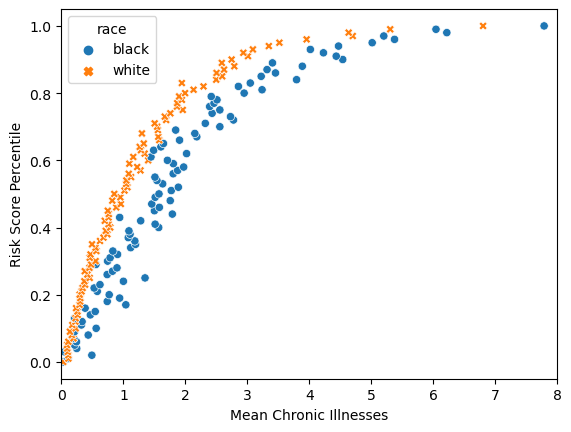

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate risk score percentiles
df['risk_score_percentile'] = df['risk_score_t'].rank(pct=True).round(2)


# Calculate mean number of gagne_sum_t within each risk score percentile
mean_gagne_per_percentile = df.groupby(['risk_score_percentile', 'race'])['gagne_sum_t'].mean().reset_index()


# Plot
sns.scatterplot(data=mean_gagne_per_percentile, x='gagne_sum_t', y='risk_score_percentile', hue='race', style='race')
plt.xlabel('Mean Chronic Illnesses')
plt.ylabel('Risk Score Percentile')
plt.xlim(0,8)
plt.show()


## Racial Disparity in Medical Expenses by Chronic Illnesses and Risk Score
Here we explore differences in cost incurred by Black and white patients with various risk scores and various numbers of chronic illnesses. These figures suggest that, for Black patients, as risk score and number of chronic illnesses increase, medical expenditures increase at a higher rate than that of white patients. For lower risk scores and chronic illness counts, white patients seem to have slightly higher medical costs than for Black patients, but it appears as though Black patients are penalized more severely for having more illnesses and being of higher risk. 

[]

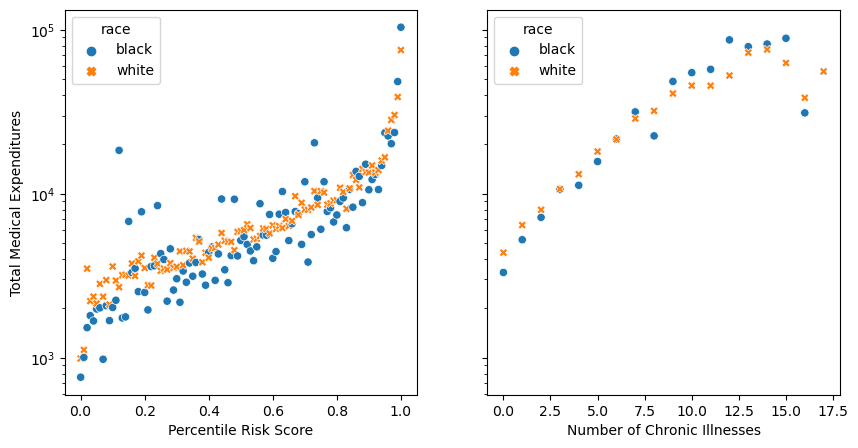

In [8]:
#group data with risk score percentile and cost
df_cost = df.groupby(['risk_score_percentile', 'race'])['cost_t'].mean().reset_index()

#group data with number of chronic illnesses and cost
df_cost2 = df.groupby(['gagne_sum_t', 'race'])['cost_t'].mean().reset_index()


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

#plot cost by percentile risk score
p1 = sns.scatterplot(data=df_cost, x='risk_score_percentile', y='cost_t', hue='race', style='race', ax = ax1)
p1.set_xlabel('Percentile Risk Score')
p1.set_ylabel('Total Medical Expenditures')
plt.gca().semilogy()

#plot cost by number of chronic illnesses
p2 = sns.scatterplot(data=df_cost2, x='gagne_sum_t', y='cost_t', hue='race', style='race', ax = ax2)
p2.set_xlabel('Number of Chronic Illnesses')
p2.set_ylabel('Total Medical Expenditures')
plt.gca().semilogy()


### Refining Data to Patients with 5 or fewer Chronic Conditions

In [10]:
import numpy as np

# Calculate the percentage of patients with 5 or fewer chronic conditions
percentage = (len(df[df['gagne_sum_t'] <= 5]) / len(df)) * 100

# 95.53952115447689 - choice to use patients with 5 or fewer chronic conditions makes sense, 
# as 96% of patients have 5 or fewer chronic conditions.

# Eliminate subjects with 0 cost, perform log function on cost column
df = df[df['cost_t'] > 0]
df['log_cost'] = df['cost_t'].apply(lambda x: np.log(x))

# Create a dummy column for the race variable
df['race_encoded'] = pd.get_dummies(df['race'], drop_first=True)

# Separate the data into predictor variables (X) and target variable (y)
X = df[['race_encoded', 'gagne_sum_t']]
y = df['log_cost']




## Logistic Regression for Medical Costs Given Number of Chronic Illnesses.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Function to add polynomial features
def add_polynomial_features(X, degree):
    X_ = X.copy()
    for j in range(1, degree):
        X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
    return X_

# Create different degrees of polynomial features and compute cross-validation scores
degrees = range(1, 15)
scores = []

for degree in degrees:
    # Add polynomial features
    X_poly = add_polynomial_features(X, degree)
    
    # Perform cross-validation with linear regression
    lr = LinearRegression()
    cv_score = cross_val_score(lr, X_poly, y, cv=5).mean()
    scores.append(cv_score)

# Determine the optimal degree based on cross-validation scores
optimal_degree = degrees[np.argmax(scores)]
print("Optimal degree based on cross-validation:", optimal_degree)

# Construct data with the optimal number of polynomial features
X_poly_optimal = add_polynomial_features(X, optimal_degree)

# Fit the final linear regression model
lr_final = LinearRegression()
lr_final.fit(X_poly_optimal, y)

# Get coefficients of the linear regression model
coefficients = lr_final.coef_


# Identify the coefficient corresponding to the Black race
wb = coefficients[-1]
print("w_b: ", wb)

# Compute e^wb
e_wb = np.exp(wb)
print("e^w_b: ", e_wb)


Optimal degree based on cross-validation: 10
w_b:  9.390071033164823e-08
e^w_b:  1.0000000939007148


This linear regression model worked best with cross validation on 10 polynomial degrees. After fitting the final linear regression model, the value I received for e^(w_b) was 1.0000000939007148, indicating that a Black patient pays slightly over 100% of the cost that an equally sick white patient must pay. 

## Discussion
The above plots give visual representations of racial disparities in medical care, and the logistic regression models slight disparities in cost incurred by equally sick patients. However, while this value of slightly more than 100% may seem like only a minor difference, it could be suggested that the value extracted from the regression does not account for the kinds of disparities that are present. As we see in the Medical Expenditure Plots above, as Risk Score Percentile and Number of Chronic Illnesses increase, so does the different in cost between Black and white patients. While white patients might pay as much as or more than Black patients for lower-risk, less severe conditions, Black patients are financially penalized as their conditions become more severe, and the logistic regression does not account for this idea. The plots clearly model differences in the way Black and white patients are treated, specifically of Barocas et al's discrimination criterion of "outcome frequency given score value". If these observations were "fair", statistics for Black and white patients would be about equal, given that their medical conditions are identical. However, we do see clear outliers and differing trends between patients of different race but identical medical conditions, scoring Black patients at significantly lower risk than equally sick white patients and with high-risk Black patients incurring significantly higher medical costs than equally sick white patients. 
